# Project-Diabetes prediction model

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression

## Data importing and analysis 

In [4]:
#importing the dataset using pandas dataframe 
diabetes_dataset=pd.read_csv(r"C:\Users\ABC\Desktop\diabetes.csv")
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_dataset.shape #knowing the number of rows and columns in the dataset

(768, 9)

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()#0 refers to non diabetic patient and 1 refers to diabetic patient 

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
dm=diabetes_dataset.groupby('Outcome').mean()
dm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
dm_nd=list(dm.iloc[0]) #nd stands for non-diabetic and d stands for diabetic 
dm_d=list(dm.iloc[1])
dm_p=list(dm) #p stands for parameters influencing diabetes 



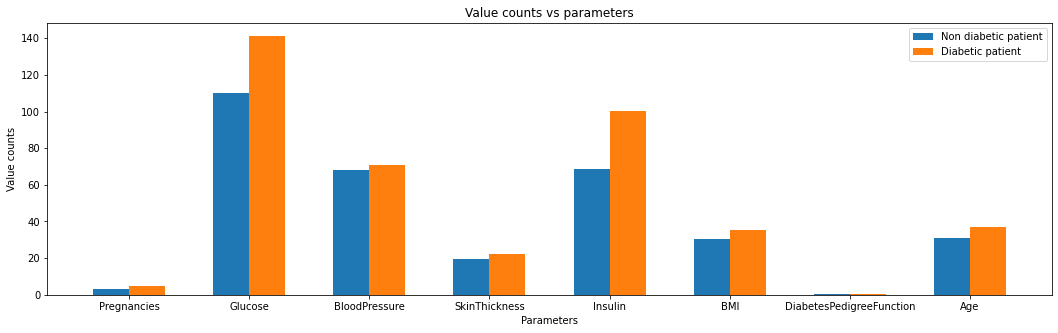

In [23]:
import matplotlib.pyplot as plt
w=0.3
f,ax=plt.subplots(figsize=(18,5))
bar1=np.arange(len(dm_p))
bar2=[i+w for i in bar1]
plt.bar(bar1,dm_nd,w,label="Non diabetic patient")
plt.bar(bar2,dm_d,w,label="Diabetic patient")
plt.xlabel("Parameters")
plt.ylabel("Value counts")
plt.title("Value counts vs parameters")
plt.xticks(bar1+w/2,dm_p)
plt.legend()
plt.show()

In [25]:
# separating data and the required label
X=diabetes_dataset.drop(columns='Outcome')
Y=diabetes_dataset['Outcome']

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Data standardization

In [29]:
# to bring the data in a common range for better prediction
sc=StandardScaler()
sc.fit(X)
sd=sc.transform(X)
#fitting and transforming data to standardize in a common range 
#sd refers to standardized data


In [30]:
print(sd)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [32]:
X=sd #assigning standardized data to the X value

# Train, test & split 

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2) #stratificiation is done so that both training & testing data have equal proportions of both the classes
print(X_train.shape)

(614, 8)


In [40]:
print(X_test.shape)



(154, 8)


# Model selection & Hyperparameter tuning 

In [51]:
# We choose SVM(Support vector machine) and logistic regression for our case 

In [52]:
from sklearn.linear_model import LogisticRegression
model_p={'svm':{'model':svm.SVC(gamma='auto',kernel='linear'),'params':{'C':[0.1,1,10,20]}},'logistic_regression':{'model':LogisticRegression(multi_class='auto'),'params':{'C':[1,0.1,0.5,10],'solver':['liblinear','lbfgs']}}}


In [60]:
#using grid search CV for hyperparameter tuning
# applying for loop for getting best score and paramters 
from sklearn.model_selection import GridSearchCV
results=[]
for model_name, mp in model_p.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,Y_train)
    results.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})
df = pd.DataFrame(results,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.781701,{'C': 1}
1,logistic_regression,0.783340,"{'C': 1, 'solver': 'liblinear'}"


In [61]:
# Hence for this data we choose logistic regression as our model with C parameter as 1 and solver as liblinear 

# Model training

In [62]:
lr=LogisticRegression(solver='liblinear',C=1)
# training the logistic regression classifier 
lr.fit(X_train,Y_train)

LogisticRegression(C=1, solver='liblinear')

# Accuracy score,precision,recall & F1 score


In [63]:
from sklearn.metrics import accuracy_score
X_train_pred=lr.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)
print('Accuracy score of the training data is:',training_data_accuracy)

Accuracy score of the training data is: 0.7833876221498371


In [64]:
# similarly calculating accuracy for test data
X_test_pred=lr.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)
print('Accuracy score of the testing data is:',test_data_accuracy)

Accuracy score of the testing data is: 0.7597402597402597


In [65]:
#Hence there is not much difference between the accuracies of the training and testing data avoiding overfitting of the data

In [66]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(lr,X_train,Y_train,cv=5)

In [67]:
# Calculating confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,y_train_pred)

array([[356,  44],
       [ 89, 125]], dtype=int64)

In [69]:
#Finding ideal confusion matrix 
confusion_matrix(Y_train,Y_train)

array([[400,   0],
       [  0, 214]], dtype=int64)

In [70]:
#Calculating precision and recall score 

In [71]:
from sklearn.metrics import precision_score,recall_score
precision_score(Y_train,y_train_pred)

0.7396449704142012

In [72]:
recall_score(Y_train,y_train_pred)

0.5841121495327103

In [73]:
#Calculating F1 score

In [74]:
from sklearn.metrics import f1_score 
f1_score(Y_train,y_train_pred)

0.6527415143603132

# Evaluating the model's performance 

In [78]:
input_data=(10,115,0,0,0,35.3,0.134,29)
#converting the input data to numpy array
na=np.asarray(input_data)
# As we are predicting just for one instance we should reshape the data
nr=na.reshape(1,-1)
# Now since we standardized our data for better results, we need to standardize our input data as well
std=sc.transform(nr)
print(std)


[[ 1.82781311 -0.184482   -3.57259724 -1.28821221 -0.69289057  0.41977549
  -1.02042653 -0.36084741]]


In [79]:
pred=lr.predict(std)
print(pred)

[1]


In [77]:
if (pred[0]==0):
    print("The person is non diabetic")
else:
    print("The person is diabetic")

The person is non diabetic


In [ ]:
# The prediciton is correct as can be seen from the input data 